# Empirical Mode Decomposition Analysis

In [1]:
import numpy as np
# Using https://bitbucket.org/luukko/libeemd.git
# and its Python binding https://bitbucket.org/luukko/pyeemd.git
import pyeemd as eemd
from matplotlib import pyplot as plt
from numpy.fft import rfft
from matplotlib_inline.backend_inline import set_matplotlib_formats
# SVG Graphing
set_matplotlib_formats('svg')

In [2]:
d = np.load("/tmp/shanghai_all.npy")

In [3]:
imfs = eemd.ceemdan(d[1])

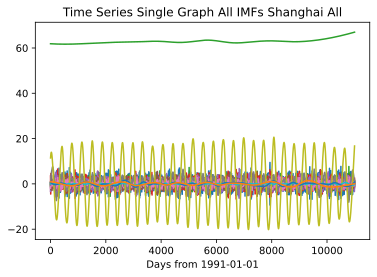

In [4]:
plt.title("Time Series Single Graph All IMFs Shanghai All")
plt.xlabel("Days from 1991-01-01")
_ = plt.plot(imfs.T)

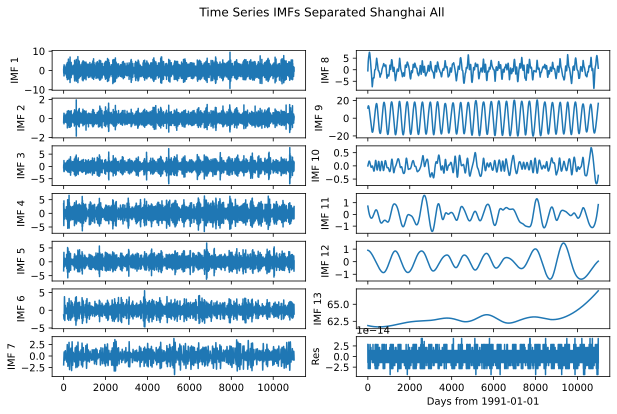

In [5]:
fig, ax = plt.subplots(int(np.ceil((len(imfs) + 1)/2)), 2, sharex=True)
ax = ax.T.flatten()
plt.gcf().set_size_inches(10, 6)
plt.xlabel("Days from 1991-01-01")
fig.suptitle("Time Series IMFs Separated Shanghai All")

for n, imf in enumerate(imfs):
    ax[n].yaxis.label.set_text(f"IMF {n + 1}")
    ax[n].plot(imf)
ax[-1].yaxis.label.set_text("Res")
ax[-1].plot(sum(imfs)-d[1])

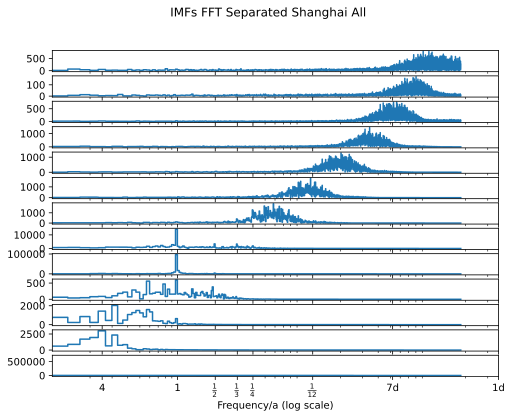

In [6]:
fig, ax = plt.subplots(len(imfs), 1, sharex=True)
n_samples_d = len(d[1])
days_per_year = 365.2524
years_per_dataset = n_samples_d/days_per_year
plt.gcf().set_size_inches(8, 6)
plt.xscale('log')
plt.xticks(
    [1/11, 1/4, 1, 2, 3, 4, 12, days_per_year/7, days_per_year],
    labels=['11','4', '1', '$\\frac{1}{2}$', '$\\frac{1}{3}$', '$\\frac{1}{4}$', '$\\frac{1}{12}$', '7d', '1d']
)
plt.xlim([0.1, max(plt.xlim())])
plt.xlabel("Frequency/a (log scale)")
fig.suptitle("IMFs FFT Separated Shanghai All")

for n, imf in enumerate(imfs):
    fft = rfft(imf)
    f_per_dataset = np.arange(len(fft))
    f_per_year = f_per_dataset/years_per_dataset
    ax[n].step(f_per_year, np.abs(fft))